# Gaussian Blur kernel size test

In [1]:
import random
import numpy
from datetime import datetime
from src.data.ParkingProvider import NoSpacesException, NoImageException
from src.metrics.PerformanceMetricsProviderSklearn import PerformanceMetricsProviderSklearn
from src.metrics.entity.PerformanceMetrics import PerformanceMetrics
from src.detector.entity.DetectionParams import DetectionParams
from src.data.ParkingProviderLocal import ParkingProviderLocalParams,ParkingProviderLocal
from src.app.ParkingOccupancyProcessorLocal import ParkingOccupancyProcessorLocal
from src.detector.OccupancyDetectorBorders import OccupancyDetectorBorders
import cv2 as cv

metrics_list = list()
row_names = list()
random_seed = datetime.now().timestamp
 
def test_parking(parking_id, detection_params:DetectionParams, row_name, process_batch=True):
    metrics_provider: PerformanceMetricsProviderSklearn = PerformanceMetricsProviderSklearn()

    provider_params = ParkingProviderLocalParams(
    parking_id=parking_id, path='E:\\Documents\\PKLot\\PKLot\\PKLot\\PKLot\\'+parking_id, k=4, random_seed=random_seed)
    
    processor = ParkingOccupancyProcessorLocal(
        parking_provider_params=provider_params, detection_params=detection_params, performance_metrics_provider=metrics_provider)

    if process_batch:
        try:
            detection_params.show_imshow=False
            processor.process_batch()
        except (NoSpacesException, NoImageException) as ex:
            print(f"Finished processing samples: ", ex)

    else:
        while True:
            try:
                processor.process()
            except (NoSpacesException, NoImageException) as ex:
                print(f"Finished processing samples: ", ex)
                break
        
    metrics_provider.calculate_metrics()
    metrics_provider.show_confusion_matrix()

    metrics_list.append(metrics_provider.metrics)
    row_names.append(row_name)
    
def test_gbk(parking_id, detection_params:DetectionParams, gbk_list):
    
    for gbk in gbk_list:
        
        row_name = f'{parking_id} gbk={gbk}'
        print('Testing ', row_name)
        
        detection_params.gb_k = gbk
        test_parking(parking_id, detection_params, row_name)
        
    PerformanceMetricsProviderSklearn.show_dataframe(metrics_list, row_names)
        

## UFPR04

Testing  UFPR04 gbk=None
Processing 947 files with 16 cores


100%|██████████| 947/947 [03:28<00:00,  4.54it/s]


Precision: 0.896
specificity: 0.900
Recall: 0.653
F1 Score: 0.755
Accuracy: 0.760


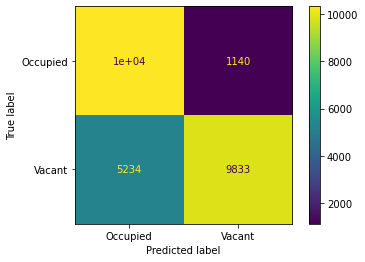

Testing  UFPR04 gbk=(3, 3)
Processing 947 files with 16 cores


100%|██████████| 947/947 [02:43<00:00,  5.79it/s]

Precision: 0.879
specificity: 0.873
Recall: 0.669
F1 Score: 0.760
Accuracy: 0.754


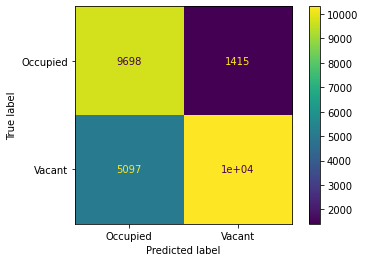

Testing  UFPR04 gbk=(5, 5)
Processing 947 files with 16 cores


100%|██████████| 947/947 [02:23<00:00,  6.58it/s]

Precision: 0.865
specificity: 0.870
Recall: 0.697
F1 Score: 0.772
Accuracy: 0.775


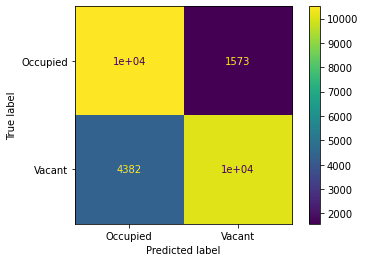

Testing  UFPR04 gbk=(7, 7)
Processing 947 files with 16 cores


100%|██████████| 947/947 [01:52<00:00,  8.45it/s]

Precision: 0.866
specificity: 0.844
Recall: 0.773
F1 Score: 0.817
Accuracy: 0.804


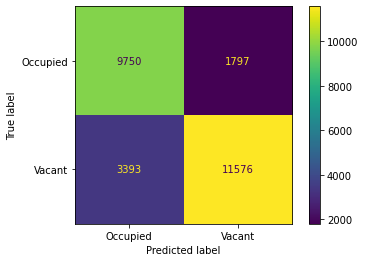

Testing  UFPR04 gbk=(9, 9)
Processing 947 files with 16 cores


100%|██████████| 947/947 [01:33<00:00, 10.14it/s]


Precision: 0.821
specificity: 0.779
Recall: 0.771
F1 Score: 0.795
Accuracy: 0.774


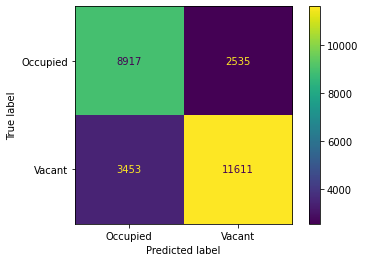

Testing  UFPR04 gbk=(13, 13)
Processing 947 files with 16 cores


100%|██████████| 947/947 [01:04<00:00, 14.61it/s]

Precision: 0.800
specificity: 0.700
Recall: 0.796
F1 Score: 0.798
Accuracy: 0.758


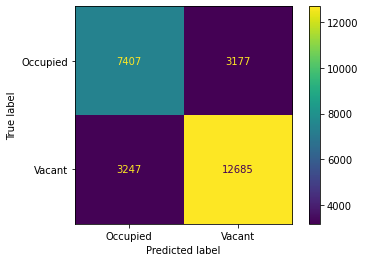

Testing  UFPR04 gbk=(21, 21)
Processing 947 files with 16 cores


100%|██████████| 947/947 [00:34<00:00, 27.55it/s]


Precision: 0.631
specificity: 0.395
Recall: 0.805
F1 Score: 0.707
Accuracy: 0.625


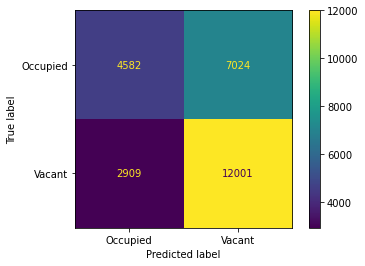

                     precision  specificity  recall     f1  accuracy
UFPR04 gbk=None          0.904        0.905   0.638  0.748     0.750
UFPR04 gbk=(3, 3)        0.882        0.875   0.674  0.764     0.759
UFPR04 gbk=(5, 5)        0.887        0.881   0.713  0.790     0.785
UFPR04 gbk=(7, 7)        0.850        0.820   0.752  0.798     0.781
UFPR04 gbk=(9, 9)        0.838        0.777   0.772  0.804     0.774
UFPR04 gbk=None          0.896        0.900   0.653  0.755     0.760
UFPR04 gbk=(3, 3)        0.879        0.873   0.669  0.760     0.754
UFPR04 gbk=(5, 5)        0.865        0.870   0.697  0.772     0.775
UFPR04 gbk=(7, 7)        0.866        0.844   0.773  0.817     0.804
UFPR04 gbk=(9, 9)        0.821        0.779   0.771  0.795     0.774
UFPR04 gbk=(13, 13)      0.800        0.700   0.796  0.798     0.758
UFPR04 gbk=(21, 21)      0.631        0.395   0.805  0.707     0.625


In [3]:
PARAMS_UFPR04 = DetectionParams((5, 5), 0, cv.ADAPTIVE_THRESH_GAUSSIAN_C, at_blockSize=31, at_C=10, median_k=3, bw_size=50, vacant_threshold=0.23, show_imshow=True)  # UFPR04
test_gbk('UFPR04', PARAMS_UFPR04, [None, (3,3), (5,5), (7,7), (9,9), (13,13), (21,21)])